<div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">
    Car Price Prediction Project
</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**
- **Benedict Kuloba**

### **Introduction**

The used car market in Kenya is a vibrant and evolving landscape, where a wide range of vehicles are bought and sold regularly. Navigating this market can be challenging, as both buyers and sellers often face the difficulty of determining fair prices due to various influencing factors such as age, mileage, and condition of the vehicles. Accurate price estimation is crucial for making informed decisions in this dynamic market.

### **Overview**

In the era of data-driven decision-making, machine learning provides a powerful tool to predict used car prices with greater accuracy. By analyzing historical data, machine learning models can identify key factors that influence car prices, helping both buyers and sellers make better decisions. This project focuses on developing a machine learning model tailored to the Kenyan market, aimed at predicting the value of used cars based on a range of features.

### **Objective**

The main objective of this project is to develop a reliable machine learning model that can predict the prices of used cars in Kenya. The model will analyze various features such as the car’s age, mileage, and condition to estimate its market value. This tool aims to empower users to make more informed decisions in the Kenyan used car market.

### **Business Understanding**

#### **Problem Statement:**

In the Kenyan used car market, determining a fair and accurate price for a vehicle is a complex task due to the variety of factors influencing car value. Both buyers and sellers require a robust system that can provide reliable price estimates to facilitate smoother transactions.

#### **Objectives:**

1. **Develop a predictive model** that accurately estimates the prices of used cars in Kenya.
2. **Identify key factors** that influence car prices, such as age, mileage, and condition.
3. **Create a user-friendly application** that allows users to input car details and receive a price estimate, aiding in decision-making.

### **Data Understanding**

The data used in this project was sourced from various Kenyan online marketplaces and classified listings. The dataset includes information on car listings from 2021, capturing details such as the car's make, model, year of manufacture, mileage, fuel type, transmission, and the listed price. This data provides a snapshot of the Kenyan used car market and serves as the foundation for building the predictive model.

---

### Data Understanding

With a substantial size of 6,019 entries, this dataset offers valuable insights for our analysis. It encompasses a range of features pertinent to the Kenyan automotive market. Below is a description of the dataset's columns:
#### Dataset Overview:
- **Source:** Kenyan Vehicle Listings
- **Total Rows:** 6,019
- **Total Columns:** 11

#### Column Details:

| **Column Name**       | **Description**                                              | **Data Type**    |
|------------------------|--------------------------------------------------------------|------------------|
| **No**                 | Unique identifier for each vehicle listing.                | Integer (int64)  |
| **Name**               | Model name of the vehicle.                                 | String (object)  |
| **Year**               | Year the vehicle was manufactured.                          | Integer (int64)  |
| **Kilometers_Driven**  | Total distance covered by the vehicle in kilometers.        | Integer (int64)  |
| **Fuel_Type**          | Type of fuel used by the vehicle (e.g., petrol, diesel).    | String (object)  |
| **Transmission**       | Transmission type of the vehicle (e.g., manual, automatic). | String (object)  |
| **Use**                | Intended use of the vehicle (e.g., personal, commercial).   | String (object)  |
| **Engine**             | Engine capacity or specification of the vehicle.           | String (object)  |
| **Power**              | Power output of the vehicle’s engine, typically in horsepower. | String (object)  |
| **Seats**              | Number of seats available in the vehicle.                  | Integer (int64)  |
| **Car_price**          | Price of the vehicle listed in Kenyan Shillings.            | Float (float64)  |

---

In [18]:
pip install --upgrade pandas numpy openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
## Importing Libraries

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

## Loading Data

In [21]:
class DataLoader:
    def __init__(self, file):
        self.file = file
    
    def load_data(self):
        try:
            df = pd.read_excel(self.file)
            return df
        except FileNotFoundError:
            print(f"File not found: {self.file}")
        except pd.errors.EmptyDataError:
            print("No data: File is empty")
        except ValueError:
            print("ValueError: Check the Excel file for potential issues")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

file = 'car_data.xlsx'
data_loader = DataLoader(file)
df = data_loader.load_data()

if df is not None:
    print(df.head())

   No                              Name  Year  Kilometers_Driven Fuel_Type  \
0   0            Maruti Wagon R LXI CNG  2010              72000       CNG   
1   1  Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2   2                      Honda Jazz V  2011              46000    Petrol   
3   3                 Maruti Ertiga VDI  2012              87000    Diesel   
4   4   Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   

  Transmission      Use   Engine      Power  Seats  Car_price  
0       Manual  foreign   998 CC  58.16 bhp    5.0   292250.0  
1       Manual  foreign  1582 CC  126.2 bhp    5.0  2087500.0  
2       Manual  foreign  1199 CC   88.7 bhp    5.0   751500.0  
3       Manual  foreign  1248 CC  88.76 bhp    7.0  1002000.0  
4    Automatic    local  1968 CC  140.8 bhp    5.0  2962580.0  


## Data Preparation

Next, we will get an overview of the dataset.

In [22]:
# preview the first five columns of the dataset
df.head()

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,foreign,998 CC,58.16 bhp,5.0,292250.0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,foreign,1582 CC,126.2 bhp,5.0,2087500.0
2,2,Honda Jazz V,2011,46000,Petrol,Manual,foreign,1199 CC,88.7 bhp,5.0,751500.0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,foreign,1248 CC,88.76 bhp,7.0,1002000.0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,local,1968 CC,140.8 bhp,5.0,2962580.0


In [23]:
# preview the last five columns of the dataset
df.tail() 

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
6014,6014,Maruti Swift VDI,2014,27365,Diesel,Manual,foreign,1248 CC,74 bhp,5.0,793250.0
6015,6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,foreign,1120 CC,71 bhp,5.0,668000.0
6016,6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,local,2498 CC,112 bhp,8.0,484300.0
6017,6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,foreign,998 CC,67.1 bhp,5.0,442550.0
6018,6018,Chevrolet Beat Diesel,2011,47000,Diesel,Manual,foreign,936 CC,57.6 bhp,5.0,417500.0


In [24]:
# Check the number of rows in the DataFrame
num_rows = len(df)
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 6019 rows.


In [25]:
#view the column names
df.columns

Index(['No', 'Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Use', 'Engine', 'Power', 'Seats', 'Car_price'],
      dtype='object')

In [26]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Car_price          6019 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 517.4+ KB


In [27]:
# Get descriptive statistics
statistics = df.describe()
print(statistics)

                No         Year  Kilometers_Driven        Seats     Car_price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6.019000e+03
mean   3009.000000  2013.358199       5.873838e+04     5.278735  1.583071e+06
std    1737.679967     3.269742       9.126884e+04     0.808840  1.868382e+06
min       0.000000  1998.000000       1.710000e+02     0.000000  7.348000e+04
25%    1504.500000  2011.000000       3.400000e+04     5.000000  5.845000e+05
50%    3009.000000  2014.000000       5.300000e+04     5.000000  9.418800e+05
75%    4513.500000  2016.000000       7.300000e+04     5.000000  1.661650e+06
max    6018.000000  2019.000000       6.500000e+06    10.000000  2.672000e+07


## Checking and Handling Duplicates

In [28]:
#Identify Duplicates

In [29]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")

Total duplicate rows: 0


This step verifies that there are no duplicate rows in the dataset, indicating that all records are unique based on the columns we've checked. With 0 duplicates identified, we can confidently move forward by checking for possible identical vehicles based on fewer columns. We can do this by comparing data based on features with as much available important features as possible. 

In [30]:
df.isnull().sum()

No                    0
Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Use                   0
Engine               36
Power                36
Seats                42
Car_price             0
dtype: int64

We filter out duplicate listings by focusing on values that increase the likelihood of uniqueness. This approach helps minimize errors that could arise from using a single feature incorrectly.

# Data Cleaning

In [31]:
class DataCleaner(DataLoader):
    def __init__(self, file):
        super().__init__(file)
    
    def clean_data(self):
        df = self.load_data()
        
        if df is not None:
            # Remove non-numeric characters and convert to float for 'Engine' and 'Power'
            df['Engine'] = df['Engine'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
            df['Power'] = df['Power'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

            # Fill missing values in 'Engine', 'Power', and 'Seats' with the median
            df['Engine'] = df['Engine'].fillna(df['Engine'].median())
            df['Power'] = df['Power'].fillna(df['Power'].median())
            df['Seats'] = df['Seats'].fillna(df['Seats'].median())

            # Convert data types
            df['Year'] = df['Year'].astype(int)
            df['Kilometers_Driven'] = df['Kilometers_Driven'].astype(int)
            df['Seats'] = df['Seats'].astype(int)
            df['Car_price'] = df['Car_price'].astype(float)

            # Remove duplicates
            df = df.drop_duplicates()

            # Standardize text data
            df['Name'] = df['Name'].str.lower()
            df['Fuel_Type'] = df['Fuel_Type'].str.lower()
            df['Transmission'] = df['Transmission'].str.lower()
            df['Use'] = df['Use'].str.lower()
            
            return df
        else:
            print("Data loading failed, cleaning process aborted.")
            return None

In [32]:
data_cleaner = DataCleaner(file)
cleaned_df = data_cleaner.clean_data()

In [33]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int32  
 3   Kilometers_Driven  6019 non-null   int32  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int32  
 10  Car_price          6019 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 446.8+ KB


In [34]:
cleaned_df.head()

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,maruti wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0
3,3,maruti ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0


In [39]:
# Create the age column
cleaned_df['age'] = 2021 - cleaned_df['Year']

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

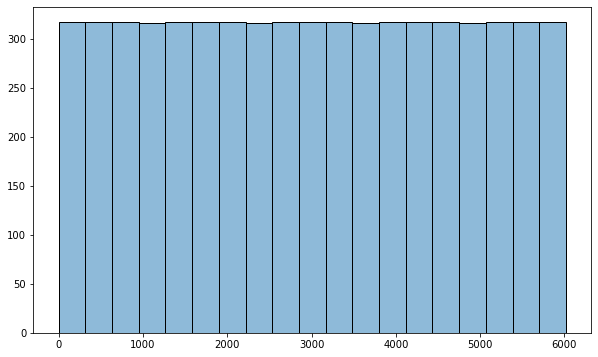

In [35]:
class EDA(DataCleaner):
    def __init__(self, file_path):
        super().__init__(file_path)
        self.cleaned_data = self.clean_data()

    def univariate_analysis(self):
        if self.cleaned_data is not None:
            numerical_columns = self.cleaned_data.select_dtypes(include=['float64', 'int64']).columns
            categorical_columns = self.cleaned_data.select_dtypes(include=['object']).columns

            # Plotting numerical features
            for column in numerical_columns:
                plt.figure(figsize=(10, 6))
                sns.histplot(self.cleaned_data[column], kde=True)
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

            # Plotting categorical features
            for column in categorical_columns:
                plt.figure(figsize=(10, 6))
                sns.countplot(y=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index)
                plt.title(f'Distribution of {column}')
                plt.xlabel('Count')
                plt.ylabel(column)
                plt.show()
        else:
            print("No data available for univariate analysis.")

    def bivariate_analysis(self):
        if self.cleaned_data is not None:
            # Scatter plot for each numerical variable against the target variable 'Car_price'
            target = 'Car_price'
            numerical_columns = self.cleaned_data.select_dtypes(include=['float64', 'int64']).columns
            numerical_columns = numerical_columns.drop(target)  # Drop the target variable from the list

            for column in numerical_columns:
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=self.cleaned_data[column], y=self.cleaned_data[target])
                plt.title(f'{column} vs {target}')
                plt.xlabel(column)
                plt.ylabel(target)
                plt.show()

            numerical_data = self.cleaned_data.select_dtypes(include=['number'])

            # Correlation Matrix
            plt.figure(figsize=(10, 6))
            sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Correlation Matrix')
            plt.show()
        else:
            print("No data available for bivariate analysis.")

    def pairplot_analysis(self):
        if self.cleaned_data is not None:
            sns.pairplot(self.cleaned_data)
            plt.show()
        else:
            print("No data available for pairplot analysis.")

eda = EDA(file)
eda.univariate_analysis()

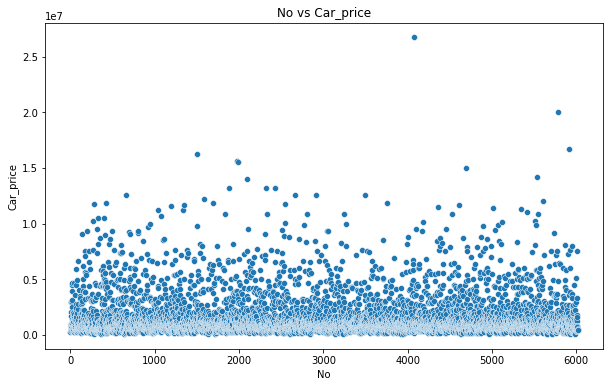

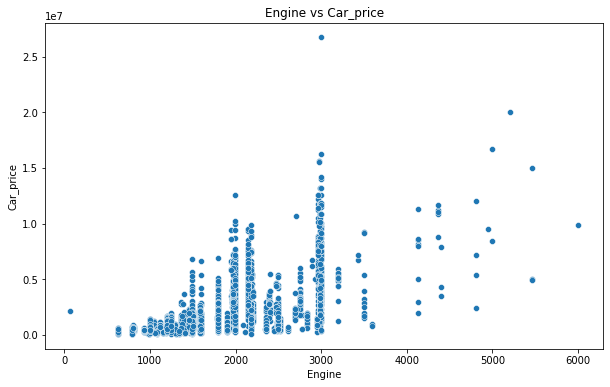

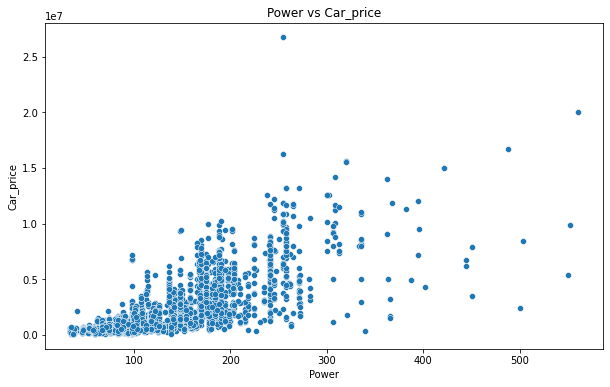

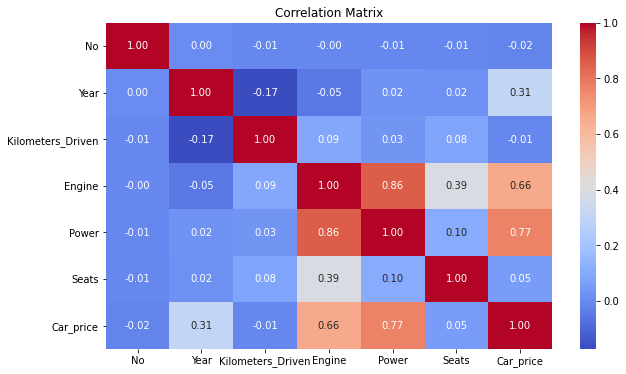

In [104]:
eda.bivariate_analysis()

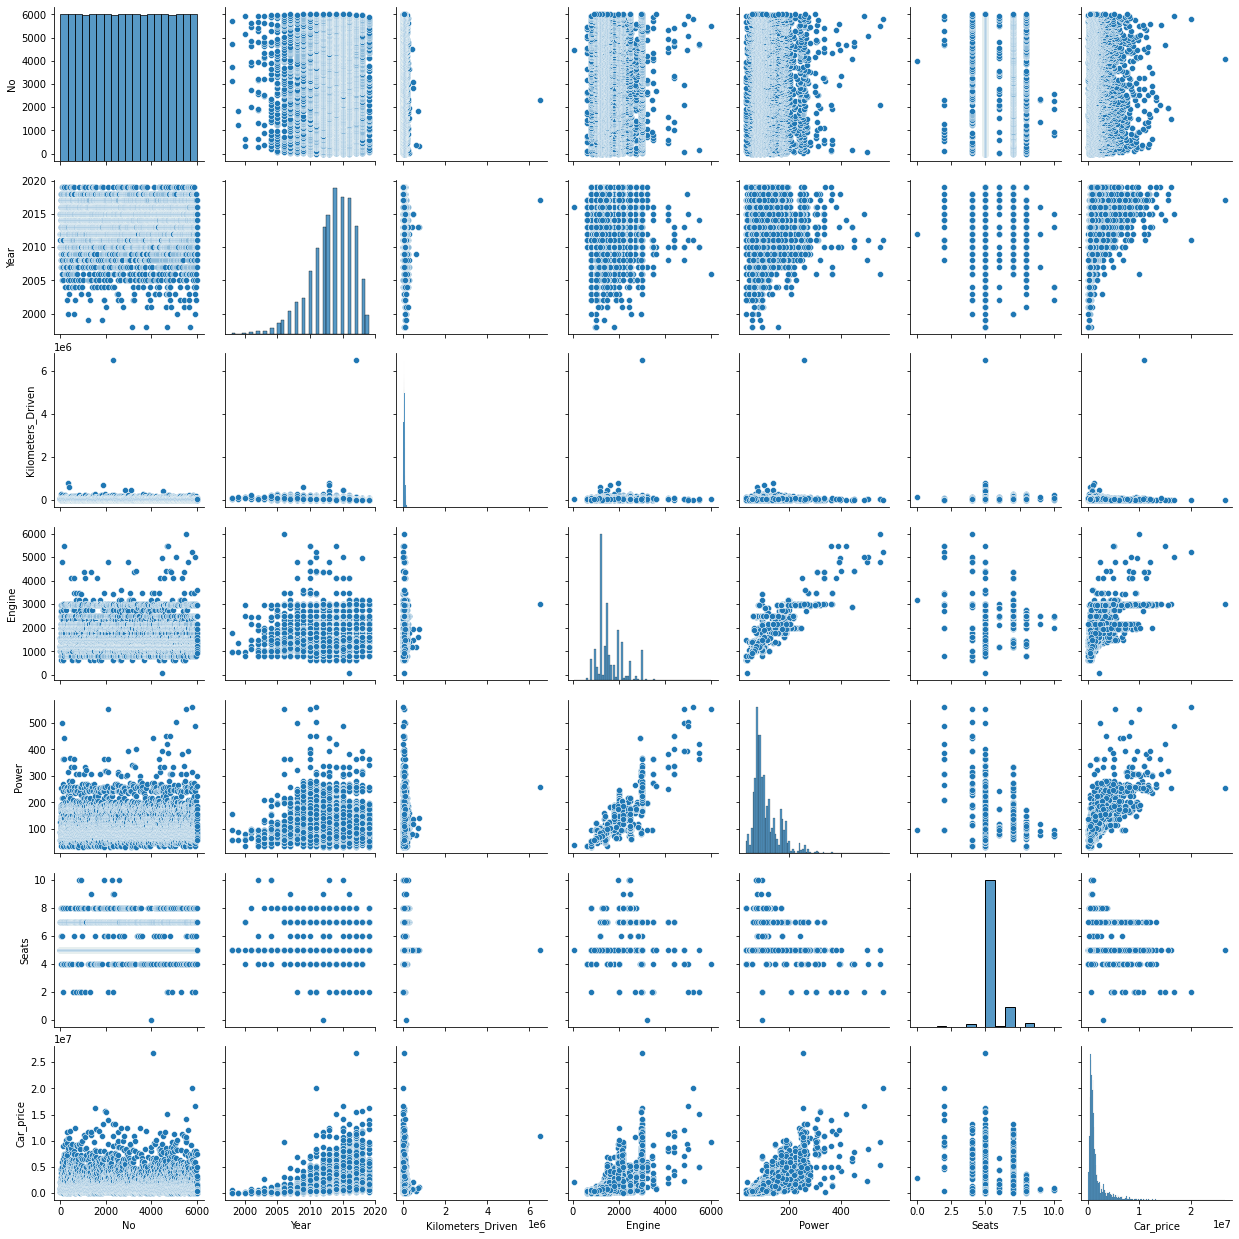

In [105]:
eda.pairplot_analysis()

Linear Regression - MSE: 748687645497.7183, R^2: 0.7818513112911019


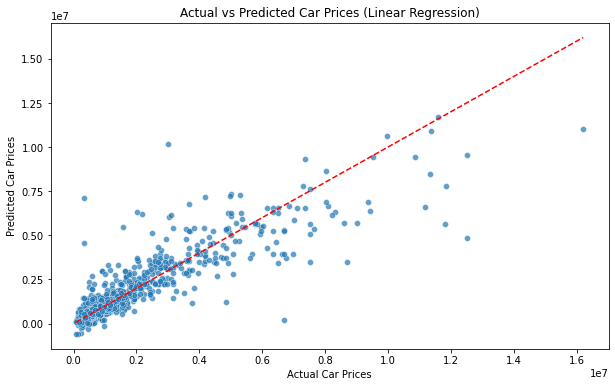

Ridge Regression - MSE: 1320111756889.7065, R^2: 0.6153527436355073


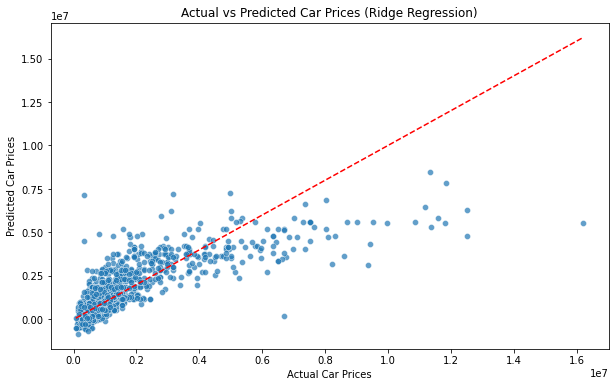

In [106]:
class ModelPipeline(DataCleaner):
    def __init__(self, file):
        super().__init__(file)
        self.cleaned_data = self.clean_data()

    def create_pipeline(self):
        if self.cleaned_data is not None:
            # Define categorical columns to be encoded
            categorical_features = self.cleaned_data.select_dtypes(include=['object']).columns.tolist()
            numerical_features = self.cleaned_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
            numerical_features.remove('Car_price')  # Removing target variable from the list

            # Create a column transformer
            preprocessor = ColumnTransformer(
                transformers=[
                    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                ],
                remainder='passthrough'  # Pass through the numerical features without transformation
            )

            # Define the Linear Regression pipeline
            linear_pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', LinearRegression())
            ])

            # Define the Ridge Regression pipeline
            ridge_pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', Ridge())
            ])

            # Splitting the data
            X = self.cleaned_data[numerical_features[1:] + categorical_features]
            y = self.cleaned_data['Car_price']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Store the pipelines and data splits
            self.linear_pipeline = linear_pipeline
            self.ridge_pipeline = ridge_pipeline
            self.X_train = X_train
            self.X_test = X_test
            self.y_train = y_train
            self.y_test = y_test

            return linear_pipeline, ridge_pipeline
        else:
            print("No data available for pipeline creation.")
            return None, None

    def visualize_model(self, model_name):
        if model_name == 'linear':
            pipeline = self.linear_pipeline
        elif model_name == 'ridge':
            pipeline = self.ridge_pipeline
        else:
            print("Model name should be 'linear' or 'ridge'")
            return

        # Fit the model
        pipeline.fit(self.X_train, self.y_train)

        # Predict on the test set
        y_pred = pipeline.predict(self.X_test)

        # Evaluate the model
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f'{model_name.capitalize()} Regression - MSE: {mse}, R^2: {r2}')

        # Visualization: Predicted vs Actual Prices
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_test, y=y_pred, alpha=0.7)
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], color='red', linestyle='--')
        plt.xlabel('Actual Car Prices')
        plt.ylabel('Predicted Car Prices')
        plt.title(f'Actual vs Predicted Car Prices ({model_name.capitalize()} Regression)')
        plt.show()



model_pipeline = ModelPipeline(file)
linear_pipeline, ridge_pipeline = model_pipeline.create_pipeline()

# Visualize the models
if linear_pipeline and ridge_pipeline:
    model_pipeline.visualize_model('linear')
    model_pipeline.visualize_model('ridge')

In [109]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np

class InteractiveModelPrediction(ModelPipeline):
    def __init__(self, file):
        super().__init__(file)
        self.linear_pipeline, self.ridge_pipeline = self.create_pipeline()
        self.create_feature_widgets()
        self.create_interactive_widgets()

    def create_feature_widgets(self):
        """Create widgets for feature inputs based on the cleaned data."""
        if self.cleaned_data is not None:
            # Create widgets for numerical features
            self.feature_sliders = {}
            self.feature_dropdowns = {}

            for column in self.cleaned_data.select_dtypes(include=['int64', 'float64']).columns:
                if column != 'Car_price':
                    self.feature_sliders[column] = widgets.FloatSlider(
                        value=self.cleaned_data[column].median(),
                        min=self.cleaned_data[column].min(),
                        max=self.cleaned_data[column].max(),
                        step=1.0,
                        description=column,
                        continuous_update=False,
                        orientation='horizontal',
                        readout=True,
                        readout_format='.1f',
                    )

            # Create widgets for categorical features
            for column in self.cleaned_data.select_dtypes(include=['object']).columns:
                self.feature_dropdowns[column] = widgets.Dropdown(
                    options=self.cleaned_data[column].unique().tolist(),
                    value=self.cleaned_data[column].unique()[0],
                    description=column,
                    disabled=False,
                )

    def create_interactive_widgets(self):
        # Dropdown for model selection
        self.model_dropdown = widgets.Dropdown(
            options=['linear', 'ridge'],
            value='linear',
            description='Model:',
            disabled=False,
        )

        # FloatSlider for Ridge regularization strength (alpha)
        self.alpha_slider = widgets.FloatSlider(
            value=1.0,
            min=0.01,
            max=10.0,
            step=0.01,
            description='Alpha:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='.2f',
        )

        # Button to trigger prediction
        self.predict_button = widgets.Button(
            description='Predict Price',
            disabled=False,
            button_style='success',
            tooltip='Click to predict the car price',
            icon='car',
        )

        # Connect the button click event to the function
        self.predict_button.on_click(self.on_predict_button_click)

        # Display the widgets
        feature_widgets = list(self.feature_sliders.values()) + list(self.feature_dropdowns.values())
        display(self.model_dropdown, self.alpha_slider, *feature_widgets, self.predict_button)

    def on_predict_button_click(self, b):
        # Collect input feature values
        input_data = {}
        for key, slider in self.feature_sliders.items():
            input_data[key] = slider.value

        for key, dropdown in self.feature_dropdowns.items():
            input_data[key] = dropdown.value

        input_df = pd.DataFrame([input_data])

        # Select the model
        model_name = self.model_dropdown.value
        if (model_name == 'ridge') and self.alpha_slider.value:
            # Update the Ridge pipeline with the selected alpha value
            self.ridge_pipeline.named_steps['regressor'].alpha = self.alpha_slider.value
            pipeline = self.ridge_pipeline
        else:
            pipeline = self.linear_pipeline

        # Make prediction
        predicted_price = pipeline.predict(input_df)[0]

        # Display the prediction
        print(f'Predicted Car Price: ${predicted_price:,.2f}')

# Example usage:
# file = 'path_to_your_file/car_data.xlsx'
interactive_model = InteractiveModelPrediction(file)

Dropdown(description='Model:', options=('linear', 'ridge'), value='linear')

FloatSlider(value=1.0, continuous_update=False, description='Alpha:', max=10.0, min=0.01, step=0.01)

FloatSlider(value=3009.0, continuous_update=False, description='No', max=6018.0, readout_format='.1f', step=1.…

FloatSlider(value=1493.0, continuous_update=False, description='Engine', max=5998.0, min=72.0, readout_format=…

FloatSlider(value=97.7, continuous_update=False, description='Power', max=560.0, min=34.2, readout_format='.1f…

Dropdown(description='Name', options=('maruti wagon r lxi cng', 'hyundai creta 1.6 crdi sx option', 'honda jaz…

Dropdown(description='Fuel_Type', options=('cng', 'diesel', 'petrol', 'lpg', 'electric'), value='cng')

Dropdown(description='Transmission', options=('manual', 'automatic'), value='manual')

Dropdown(description='Use', options=('foreign', 'local', 'fourth & above', 'third'), value='foreign')

Button(button_style='success', description='Predict Price', icon='car', style=ButtonStyle(), tooltip='Click to…

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.